In [2]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Data 준비하기

In [3]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

In [4]:
x_train.shape
y_train.shape
x_test.shape # 전체 data의 1/4 정도 밖에 안 씀
y_test.shape

(102,)

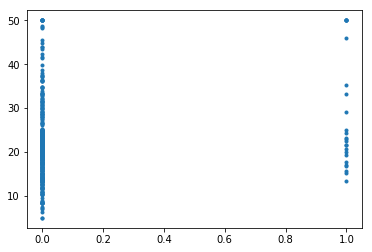

In [9]:
plt.plot(x_train[:,3], y_train, '.') # x의 한 가지 factor와 y와의 관계를 알고 싶을 때 

### model 만들기
    더 정교한 모델을 위해서는 hidden layer을 추가할 수 있다. 
    hidden layer에 몇개의 node를 넣을 지는 필요에 따라 다름. 
    node를 잇는 화살표는 무조건 행렬. 
    성능에 영향을 미치는 것
    1) hidden layer의 수
    2) hidden layer의 node의 수
    3) epoch의 수
    4) activation - nonlinearity 부과
    ( sigmoid:모든 수를 0하고 1사이로 ,tanh: -1부터 1사이로, relu: 음수는 0으로, 양수는 그대로, softmax: 총합이 1이 되도록)
    
    model summary 에서 param #의 의미: 화살표의 개수
    140= (13+1)*10
    11=(10+1)

In [18]:
model = Sequential()
model.add(Dense(10, input_shape=[13], activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### 모델 훈련하기-model.fit (=train)

In [19]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/100
404/404 [==============================] - 2s 6ms/sample - loss: 36570.5410
Epoch 2/100
404/404 [==============================] - 0s 619us/sample - loss: 26410.6322
Epoch 3/100
404/404 [==============================] - 0s 464us/sample - loss: 19525.6472
Epoch 4/100
404/404 [==============================] - 0s 348us/sample - loss: 14049.6891
Epoch 5/100
404/404 [==============================] - 0s 387us/sample - loss: 9730.0118
Epoch 6/100
404/404 [==============================] - 0s 425us/sample - loss: 6413.4791
Epoch 7/100
404/404 [==============================] - 0s 232us/sample - loss: 3953.0234
Epoch 8/100
404/404 [==============================] - 0s 193us/sample - loss: 2221.3919
Epoch 9/100
404/404 [==============================] - 0s 193us/sample - loss: 1112.7350
Epoch 10/100
404/404 [==============================] - 0s 232us/sample - loss: 519.7304
Epoch 11/100
404/404 [==============================] - 0s 232us/sample - loss: 294.8620
Epoch 12/100
404/40

### 모델 평가하기-model.evaluate(=test)

In [6]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 5ms/sample - loss: 29.6885


29.68848269593482

In [7]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


### 입력을 주고 predict 값 주기- model.predict(=infer)

In [11]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

model.predict(np.array([10, 1, 50, 1, 2, 10, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[209.65605]], dtype=float32)

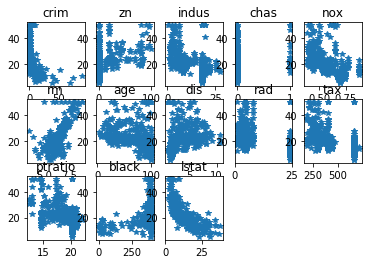

In [10]:
boston_housing=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
for i in range(13):
        plt.subplot(3,5, i+1)
        plt.plot(x_train[:,i], y_train, '*')
        plt.title(boston_housing[i])
plt.show()        